# Импорт и преобразование данных для работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/Сводный отчет за декабрь.xlsx', header=1)

In [2]:
if 'Название ККТ' in data.columns:
    # выберем данные с одной точки
    data = data[data['Название ККТ'] == 'ТРЦ "Фокус"']
    # выберем только данные прихода
    data = data[data['Тип операции'] == 'Приход']
    data['t'] = data['Дата и время'].apply(lambda x: x.day)

    data.drop(columns=['Тип операции', 'Наличными', 'Безналичными', 'Название ККТ', 'Дата и время'], inplace=True)
    data.rename(columns = {
        'Сумма': 'Y(t)'
    }, inplace=True)
data_frame = data.groupby(['t']).sum()
data_frame.reset_index(inplace=True)
data_frame.head()

,t,Y(t)
0,1,590.0
1,2,19900.0
2,3,16200.0
3,4,2570.0
4,5,7330.0


# Метод простой скользящей средней

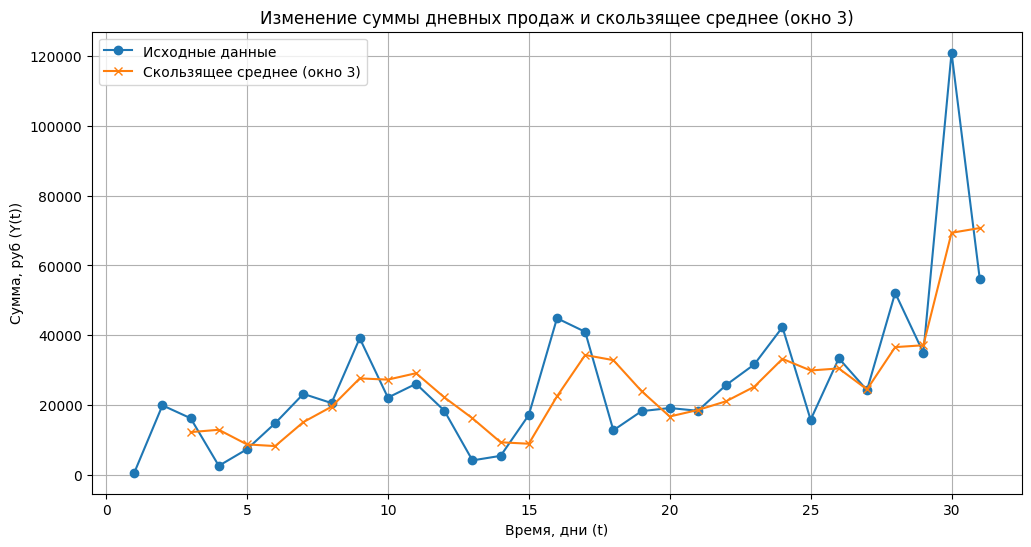

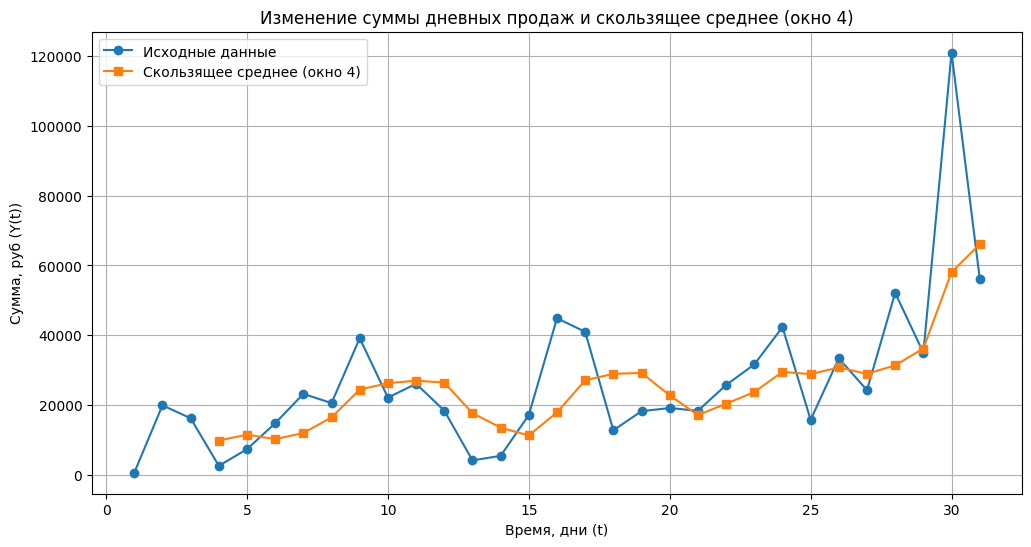

In [3]:
data_frame['SMA_3'] = data_frame['Y(t)'].rolling(window=3).mean()
data_frame['SMA_4'] = data_frame['Y(t)'].rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_3'], label='Скользящее среднее (окно 3)', marker='x')
plt.title('Изменение суммы дневных продаж и скользящее среднее (окно 3)')
plt.xlabel('Время, дни (t)')
plt.ylabel('Сумма, руб (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['SMA_4'], label='Скользящее среднее (окно 4)', marker='s')
plt.title('Изменение суммы дневных продаж и скользящее среднее (окно 4)')
plt.xlabel('Время, дни (t)')
plt.ylabel('Сумма, руб (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

#### тут окно - это количество смежных значений, по которым вычисляется среднее единовременны

# Метод взвешенной скользящей средней

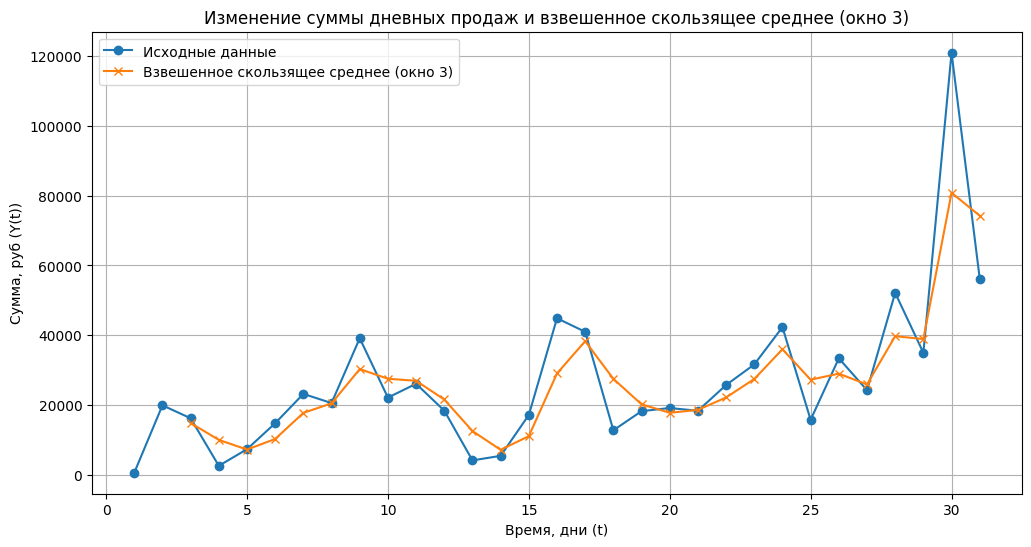

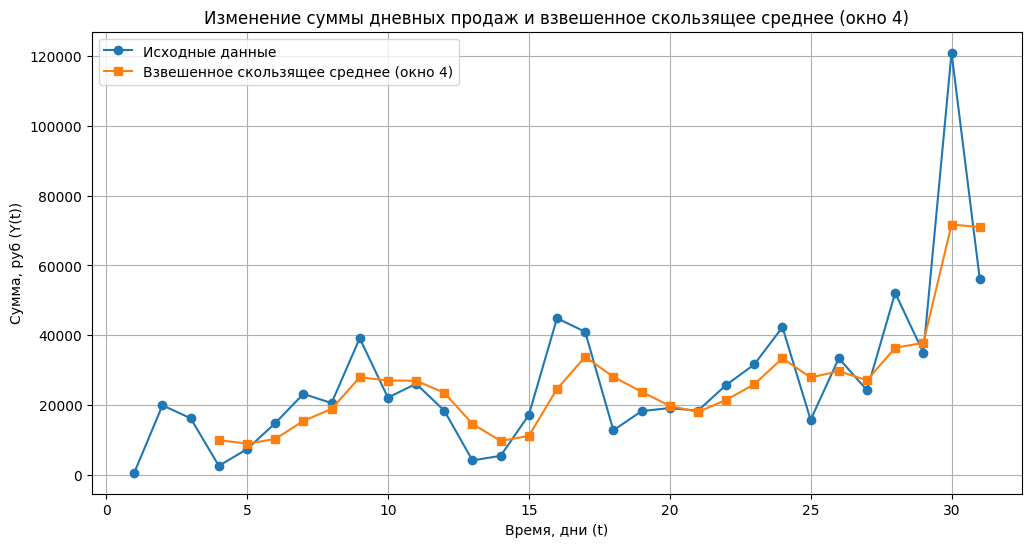

In [4]:

def weighted_moving_average(data, window_size):
    """
    Calculate the Weighted Moving Average for a given window size.
    """
    weights = np.arange(1, window_size + 1)
    return data.rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Applying Weighted Moving Average (WMA) with window sizes 3 and 4
data_frame['WMA_3'] = weighted_moving_average(data_frame['Y(t)'], 3)
data_frame['WMA_4'] = weighted_moving_average(data_frame['Y(t)'], 4)

# Plotting the data with WMA

# Graph for WMA with window size 3
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_3'], label='Взвешенное скользящее среднее (окно 3)', marker='x')
plt.title('Изменение суммы дневных продаж и взвешенное скользящее среднее (окно 3)')
plt.xlabel('Время, дни (t)')
plt.ylabel('Сумма, руб (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

# Graph for WMA with window size 4
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['WMA_4'], label='Взвешенное скользящее среднее (окно 4)', marker='s')
plt.title('Изменение суммы дневных продаж и взвешенное скользящее среднее (окно 4)')
plt.xlabel('Время, дни (t)')
plt.ylabel('Сумма, руб (Y(t))')
plt.legend()
plt.grid(True)
plt.show()

#### тут окно - это количество смежных значений, по которым вычисляется среднее единовременны

# Метод экспоненциального сглаживания

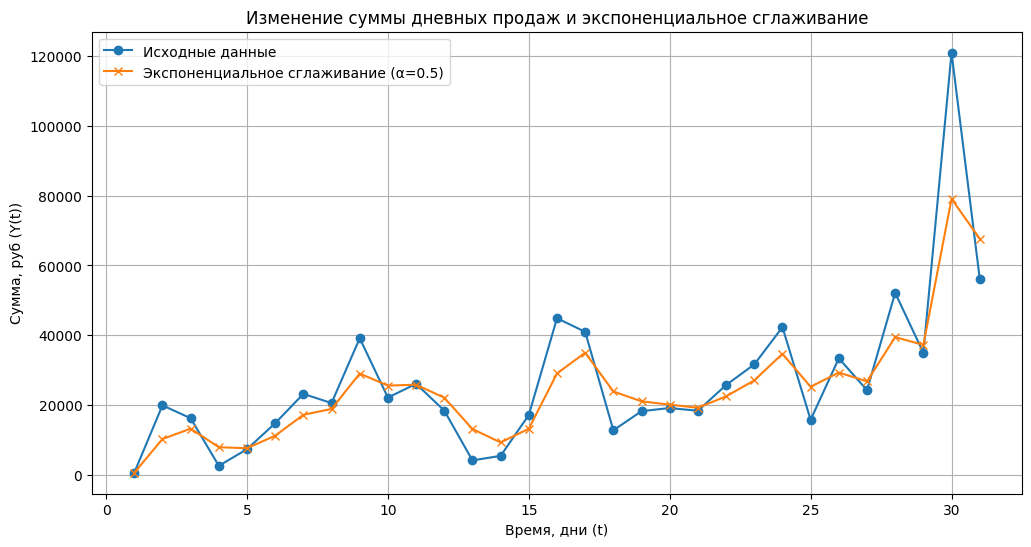

In [5]:
data_frame['EMA'] = data_frame['Y(t)'].ewm(alpha=0.5, adjust=False).mean()

# Plotting the data with EMA
plt.figure(figsize=(12, 6))
plt.plot(data_frame['t'], data_frame['Y(t)'], label='Исходные данные', marker='o')
plt.plot(data_frame['t'], data_frame['EMA'], label='Экспоненциальное сглаживание (α=0.5)', marker='x')

plt.title('Изменение суммы дневных продаж и экспоненциальное сглаживание')
plt.xlabel('Время, дни (t)')
plt.ylabel('Сумма, руб (Y(t))')
plt.legend()
plt.grid(True)
plt.show()